<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Time_Series_with_regular_breaks_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/energy_usage.csv', parse_dates=['date'], infer_datetime_format=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
date        1372 non-null datetime64[ns]
energy      1372 non-null float64
temp        1372 non-null float64
humidity    1372 non-null float64
day         1372 non-null object
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 53.7+ KB


In [4]:
df

,date,energy,temp,humidity,day
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday
5,2016-01-12 12:00:00,186.666667,7.208333,80.166667,Tuesday
6,2016-01-12 13:00:00,151.666667,7.291667,79.833333,Tuesday
7,2016-01-12 14:00:00,136.666667,6.958333,78.916667,Tuesday
8,2016-01-12 15:00:00,36.666667,6.650000,78.500000,Tuesday
9,2016-01-12 16:00:00,40.000000,6.383333,79.083333,Tuesday


In [5]:
df.head(15)

,date,energy,temp,humidity,day
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday
5,2016-01-12 12:00:00,186.666667,7.208333,80.166667,Tuesday
6,2016-01-12 13:00:00,151.666667,7.291667,79.833333,Tuesday
7,2016-01-12 14:00:00,136.666667,6.958333,78.916667,Tuesday
8,2016-01-12 15:00:00,36.666667,6.650000,78.500000,Tuesday
9,2016-01-12 16:00:00,40.000000,6.383333,79.083333,Tuesday


In [7]:
fig = px.line(df, x='date', y='energy', hover_data=['day','temp'], title='Energy Use')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=14, label="14d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [8]:
power_df=df.set_index('date')

C:\Users\mmm559\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\mmm559\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\mmm559\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\mmm559\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2

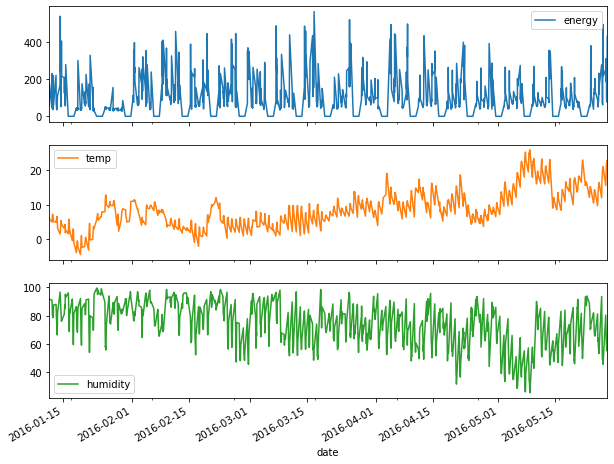

In [9]:
power_df.plot(subplots=True);

In [10]:
power_df

,energy,temp,humidity,day
date,,,,
2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday
2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday
2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday
2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday
2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday
2016-01-12 12:00:00,186.666667,7.208333,80.166667,Tuesday
2016-01-12 13:00:00,151.666667,7.291667,79.833333,Tuesday
2016-01-12 14:00:00,136.666667,6.958333,78.916667,Tuesday
2016-01-12 15:00:00,36.666667,6.650000,78.500000,Tuesday


In [11]:
filter1=df['day'] == 'Saturday'
filter2=df['day'] == 'Sunday'
df['weekday']=np.where(filter1 | filter2, 0, 1)

In [18]:
df.head()

,date,energy,temp,humidity,day,weekday
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday,1
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday,1
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday,1
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday,1
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday,1


In [19]:
df.query("day=='Saturday' or day=='Sunday'")

,date,energy,temp,humidity,day,weekday
42,2016-01-16 09:00:00,0.0,1.591667,96.166667,Saturday,0
43,2016-01-16 10:00:00,0.0,2.625000,94.166667,Saturday,0
44,2016-01-16 11:00:00,0.0,4.000000,90.500000,Saturday,0
45,2016-01-16 12:00:00,0.0,5.200000,78.250000,Saturday,0
46,2016-01-16 13:00:00,0.0,5.858333,71.833333,Saturday,0
47,2016-01-16 14:00:00,0.0,5.550000,74.583333,Saturday,0
48,2016-01-16 15:00:00,0.0,4.741667,68.666667,Saturday,0
49,2016-01-16 16:00:00,0.0,3.058333,78.083333,Saturday,0
50,2016-01-16 17:00:00,0.0,1.975000,83.833333,Saturday,0
51,2016-01-16 18:00:00,0.0,2.291667,81.750000,Saturday,0


In [22]:
## divide the 9 hours of available data into three segments with bin
df['time_bin']=pd.cut(df['date'].dt.hour,bins=3, labels=False)
df

,date,energy,temp,humidity,day,weekday,time_bin
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday,1,2
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday,1,2
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday,1,0
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday,1,0
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday,1,0
5,2016-01-12 12:00:00,186.666667,7.208333,80.166667,Tuesday,1,0
6,2016-01-12 13:00:00,151.666667,7.291667,79.833333,Tuesday,1,1
7,2016-01-12 14:00:00,136.666667,6.958333,78.916667,Tuesday,1,1
8,2016-01-12 15:00:00,36.666667,6.650000,78.500000,Tuesday,1,1
9,2016-01-12 16:00:00,40.000000,6.383333,79.083333,Tuesday,1,2


In [23]:
time_oh=pd.get_dummies(df['time_bin'], prefix='tbin')

In [24]:
time_oh

,tbin_0,tbin_1,tbin_2
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,0,1


In [25]:
df=df.join(time_oh)

In [27]:
df

,date,energy,temp,humidity,day,weekday,time_bin,tbin_0,tbin_1,tbin_2
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,Monday,1,2,0,0,1
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,Monday,1,2,0,0,1
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,Tuesday,1,0,1,0,0
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,Tuesday,1,0,1,0,0
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,Tuesday,1,0,1,0,0
5,2016-01-12 12:00:00,186.666667,7.208333,80.166667,Tuesday,1,0,1,0,0
6,2016-01-12 13:00:00,151.666667,7.291667,79.833333,Tuesday,1,1,0,1,0
7,2016-01-12 14:00:00,136.666667,6.958333,78.916667,Tuesday,1,1,0,1,0
8,2016-01-12 15:00:00,36.666667,6.650000,78.500000,Tuesday,1,1,0,1,0
9,2016-01-12 16:00:00,40.000000,6.383333,79.083333,Tuesday,1,2,0,0,1


In [28]:
df_final=df[['date','energy','temp','humidity','weekday','tbin_0','tbin_1','tbin_2']].rename({'date':'ds','energy':'y'}, axis='columns')

In [29]:
df_final

,ds,y,temp,humidity,weekday,tbin_0,tbin_1,tbin_2
0,2016-01-11 17:00:00,55.000000,6.308333,92.000000,1,0,0,1
1,2016-01-11 18:00:00,176.666667,5.941667,91.583333,1,0,0,1
2,2016-01-12 09:00:00,43.333333,5.008333,91.000000,1,1,0,0
3,2016-01-12 10:00:00,230.000000,5.758333,88.916667,1,1,0,0
4,2016-01-12 11:00:00,55.000000,6.650000,83.916667,1,1,0,0
5,2016-01-12 12:00:00,186.666667,7.208333,80.166667,1,1,0,0
6,2016-01-12 13:00:00,151.666667,7.291667,79.833333,1,0,1,0
7,2016-01-12 14:00:00,136.666667,6.958333,78.916667,1,0,1,0
8,2016-01-12 15:00:00,36.666667,6.650000,78.500000,1,0,1,0
9,2016-01-12 16:00:00,40.000000,6.383333,79.083333,1,0,0,1


In [30]:
train=df_final[(df_final['ds'] >= '2016-01-11') & (df_final['ds'] <= '2016-05-15')]
test=df_final[(df_final['ds'] > '2016-05-15')]

In [31]:
train.shape

(1242, 8)

In [32]:
test.shape

(130, 8)

In [33]:
test

,ds,y,temp,humidity,weekday,tbin_0,tbin_1,tbin_2
1242,2016-05-15 09:00:00,0.000000,8.575000,67.166667,0,1,0,0
1243,2016-05-15 10:00:00,0.000000,9.475000,63.916667,0,1,0,0
1244,2016-05-15 11:00:00,0.000000,10.250000,59.750000,0,1,0,0
1245,2016-05-15 12:00:00,0.000000,10.891667,56.750000,0,1,0,0
1246,2016-05-15 13:00:00,0.000000,11.841667,52.500000,0,0,1,0
1247,2016-05-15 14:00:00,0.000000,12.683333,48.583333,0,0,1,0
1248,2016-05-15 15:00:00,0.000000,13.133333,48.000000,0,0,1,0
1249,2016-05-15 16:00:00,0.000000,13.600000,46.750000,0,0,0,1
1250,2016-05-15 17:00:00,0.000000,13.058333,49.166667,0,0,0,1
1251,2016-05-15 18:00:00,0.000000,11.800000,59.166667,0,0,0,1


In [34]:
from fbprophet import Prophet
m = Prophet()

C:\Users\mmm559\Anaconda3\envs\ftrml_milad\lib\site-packages\scipy\__init__.py:137: UserWarning:

NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.4)



In [35]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods=130, freq='H')
future.tail(50)

,ds
1322,2016-05-18 03:00:00
1323,2016-05-18 04:00:00
1324,2016-05-18 05:00:00
1325,2016-05-18 06:00:00
1326,2016-05-18 07:00:00
1327,2016-05-18 08:00:00
1328,2016-05-18 09:00:00
1329,2016-05-18 10:00:00
1330,2016-05-18 11:00:00
1331,2016-05-18 12:00:00


In [37]:
future = m.make_future_dataframe(periods=312, freq='H')
future.tail(50)

,ds
1504,2016-05-25 17:00:00
1505,2016-05-25 18:00:00
1506,2016-05-25 19:00:00
1507,2016-05-25 20:00:00
1508,2016-05-25 21:00:00
1509,2016-05-25 22:00:00
1510,2016-05-25 23:00:00
1511,2016-05-26 00:00:00
1512,2016-05-26 01:00:00
1513,2016-05-26 02:00:00


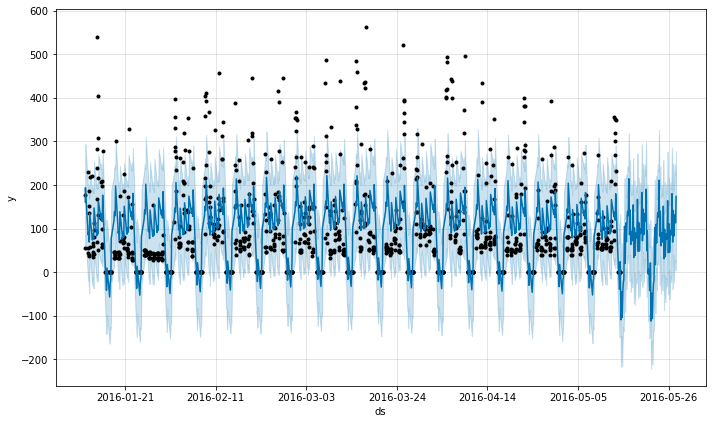

In [38]:
fcst = m.predict(future)
fig = m.plot(fcst)

In [42]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-11 17:00:00,69.335654,51.718910,263.007610,69.335654,69.335654,91.970634,91.970634,91.970634,24.524938,24.524938,24.524938,67.445696,67.445696,67.445696,0.0,0.0,0.0,161.306288
1,2016-01-11 18:00:00,69.359482,85.276548,293.791802,69.359482,69.359482,124.363773,124.363773,124.363773,57.712233,57.712233,57.712233,66.651539,66.651539,66.651539,0.0,0.0,0.0,193.723255
2,2016-01-12 09:00:00,69.716907,-21.417336,192.189521,69.716907,69.716907,15.468602,15.468602,15.468602,-9.515399,-9.515399,-9.515399,24.984001,24.984001,24.984001,0.0,0.0,0.0,85.185509
3,2016-01-12 10:00:00,69.740735,-17.107100,198.712964,69.740735,69.740735,19.515513,19.515513,19.515513,-2.579978,-2.579978,-2.579978,22.095491,22.095491,22.095491,0.0,0.0,0.0,89.256248
4,2016-01-12 11:00:00,69.764564,-9.553978,192.827789,69.764564,69.764564,20.203657,20.203657,20.203657,0.813803,0.813803,0.813803,19.389853,19.389853,19.389853,0.0,0.0,0.0,89.968220
5,2016-01-12 12:00:00,69.788392,-10.689708,198.249228,69.788392,69.788392,18.911133,18.911133,18.911133,2.022359,2.022359,2.022359,16.888774,16.888774,16.888774,0.0,0.0,0.0,88.699525
6,2016-01-12 13:00:00,69.812220,-33.391968,189.411317,69.812220,69.812220,13.867153,13.867153,13.867153,-0.742979,-0.742979,-0.742979,14.610132,14.610132,14.610132,0.0,0.0,0.0,83.679374
7,2016-01-12 14:00:00,69.836049,-25.165935,189.328802,69.836049,69.836049,4.977966,4.977966,4.977966,-7.589960,-7.589960,-7.589960,12.567925,12.567925,12.567925,0.0,0.0,0.0,74.814014
8,2016-01-12 15:00:00,69.859877,-48.013247,169.481354,69.859877,69.859877,-0.958677,-0.958677,-0.958677,-11.730924,-11.730924,-11.730924,10.772247,10.772247,10.772247,0.0,0.0,0.0,68.901200
9,2016-01-12 16:00:00,69.883705,-22.951724,185.918904,69.883705,69.883705,6.867067,6.867067,6.867067,-2.362249,-2.362249,-2.362249,9.229316,9.229316,9.229316,0.0,0.0,0.0,76.750773


In [43]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
1534,2016-05-26 23:00:00,68.853460,-39.519305,178.278624
1535,2016-05-27 00:00:00,84.652376,-18.265199,186.770662
1536,2016-05-27 01:00:00,117.878833,4.776957,215.679823
1537,2016-05-27 02:00:00,141.721507,40.289735,249.540262
1538,2016-05-27 03:00:00,139.653229,35.878780,245.079514
1539,2016-05-27 04:00:00,116.635415,15.908459,230.035761
1540,2016-05-27 05:00:00,92.102657,-19.373651,200.916340
1541,2016-05-27 06:00:00,82.787072,-24.139621,189.050763
1542,2016-05-27 07:00:00,91.021986,-14.922145,200.274178
1543,2016-05-27 08:00:00,107.085614,7.865380,217.696692


In [45]:
future_final=future.copy()

In [57]:
# future_final[(future_final['ds'].dt.hour > 8) & (future_final['ds'].dt.hour < 19)]

In [53]:
future_final=future_final[future_final['ds'].dt.hour > 8][future_final['ds'].dt.hour < 19]

C:\Users\mmm559\Anaconda3\envs\ftrml_milad\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [56]:
# future_final.tail(50)

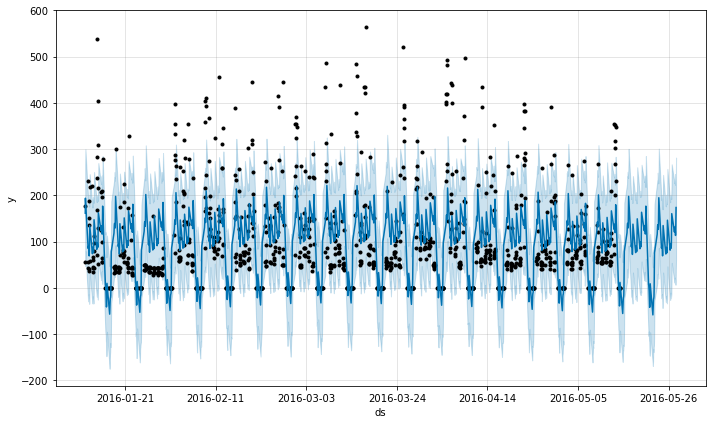

In [55]:
fcst = m.predict(future_final)
fig = m.plot(fcst)

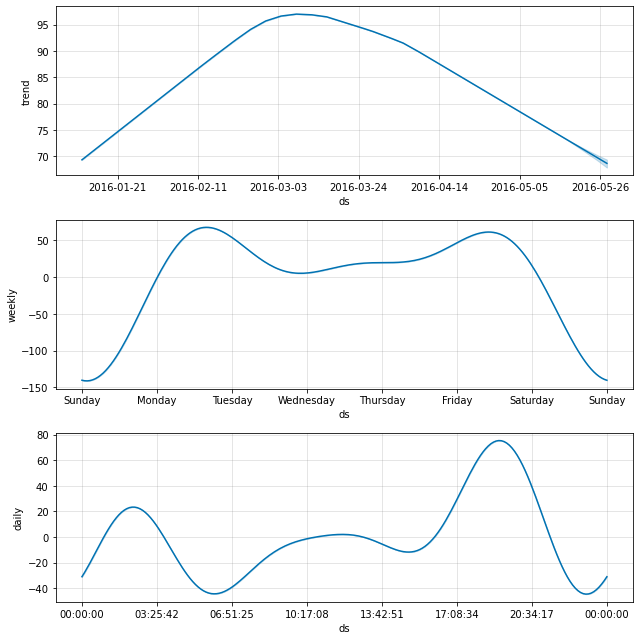

In [58]:
fig2 = m.plot_components(fcst)

In [59]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
1352,2016-05-26 09:00:00,81.368693,-26.273908,184.957352
1353,2016-05-26 10:00:00,88.995635,-25.453614,198.040823
1354,2016-05-26 11:00:00,93.227488,-14.467847,199.541113
1355,2016-05-26 12:00:00,95.427701,-10.837531,201.056213
1356,2016-05-26 13:00:00,93.811883,-15.458644,199.646696
1357,2016-05-26 14:00:00,88.273596,-21.454811,196.601463
1358,2016-05-26 15:00:00,85.598664,-17.325395,191.998037
1359,2016-05-26 16:00:00,96.585609,-14.159529,208.628465
1360,2016-05-26 17:00:00,125.234846,16.018256,228.339365
1361,2016-05-26 18:00:00,160.316130,53.881988,267.059509


In [60]:
fcst['day'] = fcst['ds'].dt.day_name()
fcst[['ds','day', 'yhat', 'yhat_lower', 'yhat_upper']].query("day == 'Saturday'")

,ds,day,yhat,yhat_lower,yhat_upper
42,2016-01-16 09:00:00,Saturday,7.394928,-95.215774,115.665355
43,2016-01-16 10:00:00,Saturday,6.021585,-99.977690,120.150036
44,2016-01-16 11:00:00,Saturday,1.231965,-100.160229,112.649609
45,2016-01-16 12:00:00,Saturday,-5.554064,-115.365295,100.460684
46,2016-01-16 13:00:00,Saturday,-16.062124,-118.679678,99.515071
47,2016-01-16 14:00:00,Saturday,-30.337950,-138.332029,79.240425
48,2016-01-16 15:00:00,Saturday,-41.533529,-148.010557,66.021147
49,2016-01-16 16:00:00,Saturday,-38.787149,-142.954333,76.010208
50,2016-01-16 17:00:00,Saturday,-18.034711,-131.627787,93.211258
51,2016-01-16 18:00:00,Saturday,9.557172,-95.259921,112.946199


In [61]:
m = Prophet(seasonality_mode='multiplicative', daily_seasonality=True, interval_width=0.95)
m.add_regressor('weekday',standardize=False)
m.add_regressor('temp',standardize=False )
m.add_regressor('tbin_0',standardize=False)
m.add_regressor('tbin_1',standardize=False)
m.add_regressor('tbin_2',standardize=False)

In [64]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [65]:
future_final=future_final.reset_index()

In [66]:
future_final['weekday'] = df_final['weekday']
future_final['temp'] = df_final['temp']
future_final['tbin_0'] = df_final['tbin_0']
future_final['tbin_1'] = df_final['tbin_1']
future_final['tbin_2'] = df_final['tbin_2']

In [67]:
future_final

,index,ds,weekday,temp,tbin_0,tbin_1,tbin_2
0,0,2016-01-11 17:00:00,1,6.308333,0,0,1
1,1,2016-01-11 18:00:00,1,5.941667,0,0,1
2,2,2016-01-12 09:00:00,1,5.008333,1,0,0
3,3,2016-01-12 10:00:00,1,5.758333,1,0,0
4,4,2016-01-12 11:00:00,1,6.650000,1,0,0
5,5,2016-01-12 12:00:00,1,7.208333,1,0,0
6,6,2016-01-12 13:00:00,1,7.291667,0,1,0
7,7,2016-01-12 14:00:00,1,6.958333,0,1,0
8,8,2016-01-12 15:00:00,1,6.650000,0,1,0
9,9,2016-01-12 16:00:00,1,6.383333,0,0,1


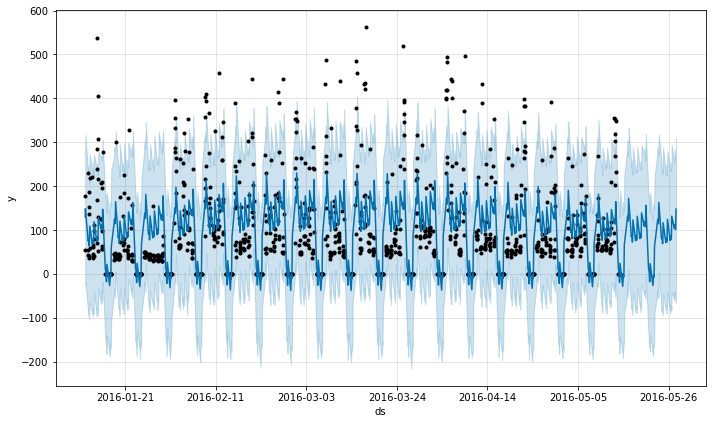

In [68]:
fcst = m.predict(future_final)
fig = m.plot(fcst)

In [69]:
fcst['day'] = fcst['ds'].dt.day_name()
fcst[['ds','day', 'yhat', 'yhat_lower', 'yhat_upper']].query("day == 'Saturday'")

,ds,day,yhat,yhat_lower,yhat_upper
42,2016-01-16 09:00:00,Saturday,9.309703,-149.684605,173.741472
43,2016-01-16 10:00:00,Saturday,8.242697,-139.517926,179.380922
44,2016-01-16 11:00:00,Saturday,7.973141,-148.814770,174.429511
45,2016-01-16 12:00:00,Saturday,2.395223,-161.340053,153.647198
46,2016-01-16 13:00:00,Saturday,0.432525,-158.999962,161.646374
47,2016-01-16 14:00:00,Saturday,-13.554973,-177.211117,144.801130
48,2016-01-16 15:00:00,Saturday,-18.300797,-183.702856,138.855769
49,2016-01-16 16:00:00,Saturday,-17.766382,-178.502467,137.640524
50,2016-01-16 17:00:00,Saturday,3.290937,-151.818163,175.271836
51,2016-01-16 18:00:00,Saturday,21.643876,-140.572950,185.298108
